In [1]:
using ScikitLearn
@sk_import linear_model : RidgeClassifierCV
@sk_import preprocessing : StandardScaler
@sk_import pipeline : make_pipeline

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



┌ Info: Running `conda install -y -c conda-forge llvm-openmp` in root environment
└ @ Conda /Users/wiktor/.julia/packages/Conda/x2UxR/src/Conda.jl:127
┌ Info: Running `conda install -y -c conda-forge llvm-openmp` in root environment
└ @ Conda /Users/wiktor/.julia/packages/Conda/x2UxR/src/Conda.jl:127
┌ Warning: Module pipeline has been ported to Julia - try `import ScikitLearn: Pipelines` instead
└ @ ScikitLearn.Skcore /Users/wiktor/.julia/packages/ScikitLearn/7Csem/src/Skcore.jl:193
┌ Info: Running `conda install -y -c conda-forge llvm-openmp` in root environment
└ @ Conda /Users/wiktor/.julia/packages/Conda/x2UxR/src/Conda.jl:127


PyObject <function make_pipeline at 0x7fdda4285700>

In [16]:
# Load dataset

include("datasets.jl")

# Download datasets if needed
# download_dataset("Cricket", "datasets")

X_train, y_train, X_test, y_test = load_dataset("Cricket");

┌ Info: Loading dataset: Cricket, scope: train
└ @ Main /Volumes/lodygaw/2022/learning/wdum/datasets.jl:39
┌ Info: Dataset size: 
│ 	Instances: 108 
│ 	Columns: 6 
│ 	Timepoints: 1197
└ @ Main /Volumes/lodygaw/2022/learning/wdum/datasets.jl:48
┌ Info: Loading dataset: Cricket, scope: test
└ @ Main /Volumes/lodygaw/2022/learning/wdum/datasets.jl:39
┌ Info: Dataset size: 
│ 	Instances: 72 
│ 	Columns: 6 
│ 	Timepoints: 1197
└ @ Main /Volumes/lodygaw/2022/learning/wdum/datasets.jl:48


In [17]:
# Trim timeseries with stratification over classes 

ranges = [Interval{Closed, Closed}(0.1, 0.4),
          Interval{Open, Closed}(0.4, 0.7),
          Interval{Open, Closed}(0.7,1.0)]

X_train = trim_timeseries(X_train, y_train, ranges)
X_test = trim_timeseries(X_test, y_test, ranges)

show_stratification(X_train, y_train)

Class 1.0 stratification (9 elements):
  Range 0.1<=x<=0.4: 	3/9
  Range 0.4<x<=0.7: 	3/9
  Range 0.7<x<=1.0: 	3/9

Class 2.0 stratification (9 elements):
  Range 0.1<=x<=0.4: 	3/9
  Range 0.4<x<=0.7: 	3/9
  Range 0.7<x<=1.0: 	3/9

Class 3.0 stratification (9 elements):
  Range 0.1<=x<=0.4: 	3/9
  Range 0.4<x<=0.7: 	3/9
  Range 0.7<x<=1.0: 	3/9

Class 4.0 stratification (9 elements):
  Range 0.1<=x<=0.4: 	3/9
  Range 0.4<x<=0.7: 	3/9
  Range 0.7<x<=1.0: 	3/9

Class 5.0 stratification (9 elements):
  Range 0.1<=x<=0.4: 	3/9
  Range 0.4<x<=0.7: 	3/9
  Range 0.7<x<=1.0: 	3/9

Class 6.0 stratification (9 elements):
  Range 0.1<=x<=0.4: 	3/9
  Range 0.4<x<=0.7: 	3/9
  Range 0.7<x<=1.0: 	3/9

Class 7.0 stratification (9 elements):
  Range 0.1<=x<=0.4: 	3/9
  Range 0.4<x<=0.7: 	3/9
  Range 0.7<x<=1.0: 	3/9

Class 8.0 stratification (9 elements):
  Range 0.1<=x<=0.4: 	3/9
  Range 0.4<x<=0.7: 	3/9
  Range 0.7<x<=1.0: 	3/9

Class 9.0 stratification (9 elements):
  Range 0.1<=x<=0.4: 	3/9
  Range

In [18]:
# Forecast trimmed timeseries with 3 different algorithm

include("forecast.jl")

target_length = 1000


# forecast with mean padding
X_train_forecasted_mean = forecast(Mean, X_train, target_length)
X_test_forecasted_mean = forecast(Mean, X_test, target_length)

# forecast with NaiveMultiple original algorithm
max_overlap = ceil(Int, 0.1 * target_length)
min_overlap = ceil(Int, 0.01 * target_length)
threshold = 0.4

X_train_forecasted_mult = forecast(NaiveMultiple, X_train, target_length, max_overlap, min_overlap, threshold)
X_test_forecasted_mult = forecast(NaiveMultiple, X_test, target_length, max_overlap, min_overlap, threshold)

# forecast with NaiveSingle original algorithm
window_size = 4
overlap = 3

X_train_forecasted_org = forecast(NaiveSingle, X_train, target_length, window_size, overlap)
X_test_forecasted_org = forecast(NaiveSingle, X_test, target_length, window_size, overlap)

72×6×1000 Array{Float32, 3}:
[:, :, 1] =
 -0.7005   -0.49244   -0.58608   -0.44382   0.66156   -0.22074
 -0.85801  -0.12735   -0.34155   -0.4933    0.45586   -0.1574
 -0.37458   0.40771   -0.27929   -0.13219  -0.34596   -0.60197
 -0.41039   0.24499   -0.07809   -0.12654  -0.15114   -0.37116
 -0.71832  -0.14954   -0.4244    -0.37109   0.51903   -0.36629
 -0.68622  -0.27868   -0.46384   -0.42062   0.52834   -0.3757
  0.17108  -0.40626   -0.21893    0.85099   0.30728    0.090377
  0.43485   0.071961   0.30086    1.243    -0.18343    0.46985
  0.4429   -0.32067    0.32728    0.23203   0.048278   0.59717
  0.26845  -0.23       0.21602    0.85265   0.24327    0.24421
  0.17338  -0.34942    0.51468    1.1448    0.075665   0.60677
  0.27512  -0.0386     0.60837    0.24083   0.10005    0.28409
  1.2068   -0.087586   0.66054   -0.40983   0.92523   -0.40544
  ⋮                                                    ⋮
 -0.98409  -0.002865  -1.1956    -0.60861   0.4284    -1.0959
 -1.0023   -0.21169   

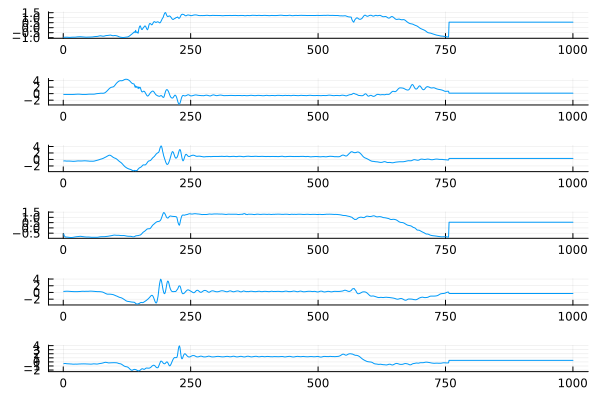

In [19]:
plot_timeseries(X_train_forecasted_mean[1,:,:])

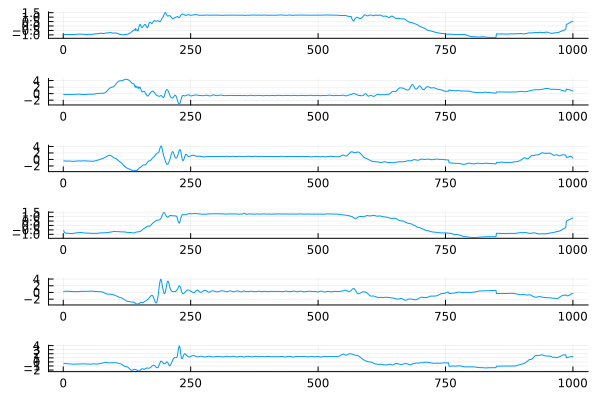

In [20]:
plot_timeseries(X_train_forecasted_mult[1,:,:])

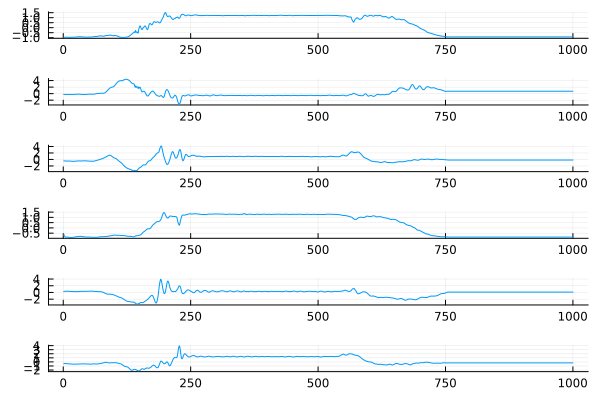

In [21]:
plot_timeseries(X_train_forecasted_org[1,:,:])

In [8]:
# Transform with ROCKET

include("rocket.jl")
rocket_org = Rocket()
rocket_mean = Rocket()
rocket_mult = Rocket()

fit!(rocket_org, X_train_forecasted_org);
fit!(rocket_mean, X_train_forecasted_mean);
fit!(rocket_mult, X_train_forecasted_mean);

X_train_transform_org = transform!(rocket_org, X_train_forecasted_org);
X_train_transform_mean = transform!(rocket_mean, X_train_forecasted_mean);
X_train_transform_mult = transform!(rocket_mult, X_train_forecasted_mult);

X_test_transform_org = transform!(rocket_org, X_test_forecasted_org);
X_test_transform_mean = transform!(rocket_mean, X_test_forecasted_mean);
X_test_transform_mult = transform!(rocket_mult, X_test_forecasted_mult);

In [9]:
# Classify with RidgeClassifierCV

alphas = [1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]

ridge_org = make_pipeline(StandardScaler(), RidgeClassifierCV(alphas=alphas))
ridge_mean = make_pipeline(StandardScaler(), RidgeClassifierCV(alphas=alphas))
ridge_mult = make_pipeline(StandardScaler(), RidgeClassifierCV(alphas=alphas))

ridge_org.fit(X_train_transform_org, y_train)
ridge_mean.fit(X_train_transform_mean, y_train)
ridge_mult.fit(X_train_transform_mult, y_train)

score_org = ridge_org.score(X_test_transform_org, y_test)
score_mean = ridge_mean.score(X_test_transform_mean, y_test)
score_mult = ridge_mult.score(X_test_transform_mult, y_test)

println("Mean padding score \t$score_mean")
println("NaiveMultiple score \t$score_mult")
println("NaiveSingle score \t$score_org")


Mean padding score 	0.9583333333333334
NaiveMultiple score 	0.9722222222222222
NaiveSingle score 	0.9444444444444444
